In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_run, replay_fig, replay_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import ListedColormap
from neo.rawio import neuroscoperawio

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# session = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_82622\Z__Data_GrosmarkAD_Achilles_Achilles_11012013.pkl"
# session = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_82622\Z__Data_Can_OML22_day6.pkl"
session = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_82622\Z__Data_GrosmarkAD_Achilles_Achilles_10252013.pkl"
with open(session, "rb") as f:
    results = pickle.load(f)

In [3]:
class LoadLfp(object):
    def __init__(
        self,
        basepath,
        channels
    ):
        self.basepath = basepath
        self.channels = channels
        self.get_xml_data()
        self.load_lfp()

    def get_xml_data(self):
        nChannels, fs, fs_dat, shank_to_channel = loading.loadXML(self.basepath)
        self.nChannels = nChannels
        self.fs = fs
        self.fs_dat = fs_dat
        self.shank_to_channel = shank_to_channel

    def load_lfp(self):
        lfp, timestep = loading.loadLFP(
            self.basepath,
            n_channels=self.nChannels,
            channel=self.channels,
            frequency=self.fs,
            ext="lfp",
        )
        self.lfp = nel.AnalogSignalArray(
            data=lfp.T,
            timestamps=timestep,
            fs=self.fs,
            support=nel.EpochArray(np.array([min(timestep), max(timestep)])),
        )

basepath = r"Z:\Data\GrosmarkAD\Achilles\Achilles_10252013"
lfp = LoadLfp(basepath,4)

In [34]:
width*current_bst.n_bins*.1

0.8858267953507681

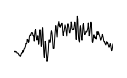

In [16]:
ratio = (0.5, 1)
fraction = 0.25
i = 1566
direction = "outbound_epochs"

current_bst = results[direction]["bst_placecells"][int(i)].copy()

width, height = functions.set_size("thesis", fraction=fraction, subplots=ratio)

plt.figure(figsize=(width * current_bst.n_bins * 0.1, height))

current_epoch = current_bst.support.expand(0.03)
plt.plot(
    lfp.lfp[current_epoch].abscissa_vals,
    lfp.lfp[current_epoch].data.T,
    color="k",
    linewidth=0.5,
)
plt.xlim(current_epoch.start, current_epoch.stop)

plt.axis("off")
plt.savefig(
    os.path.join(fig_save_path, "Achilles_10252013_outbound_ripple_v2_"+str(i)+".svg"),
    dpi=300,
    bbox_inches="tight",
)


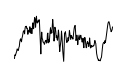

In [17]:
i = 1197
current_bst = results[direction]["bst_placecells"][int(i)].copy()

width, height = functions.set_size(
    'thesis', fraction=fraction, subplots=ratio)

plt.figure(figsize=(width*current_bst.n_bins*.1, height))
current_epoch = current_bst.support.expand(0.03)

plt.plot(lfp.lfp[current_epoch].abscissa_vals, lfp.lfp[current_epoch].data.T,color="k",linewidth=.5)
plt.xlim(current_epoch.start,current_epoch.stop)
plt.axis("off")
plt.savefig(
    os.path.join(fig_save_path, "Achilles_10252013_outbound_ripple_v2_"+str(i)+".svg"),
    dpi=300,
    bbox_inches="tight",
)

In [46]:
lfp.lfp.abscissa_vals

19632.459450000002

In [10]:
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
direction = "outbound_epochs"

deepSuperficial = (results[direction]["cell_metrics"].deepSuperficial == "Deep") * -1

idx = [1566, 1197, 1216, 1468, 1967, 1979, 2197]

i = 1566
results[direction]["bst_placecells"][int(i)].support.start
# results[direction]["sta_placecells"],
# results[direction]["tc"],
# results[direction]["tc"],

23146.09945

1566


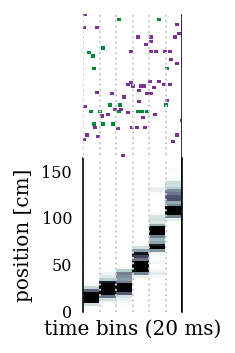

1197


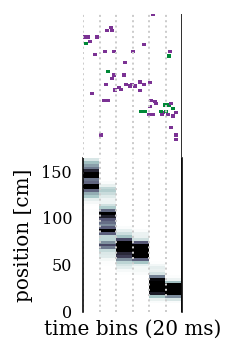

1216


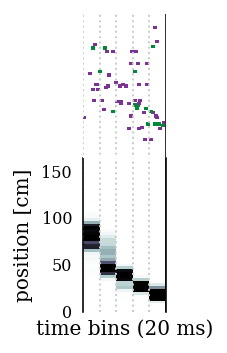

1468


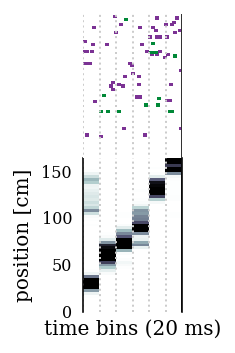

1967


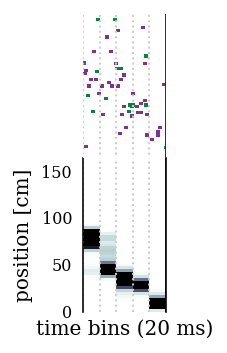

1979


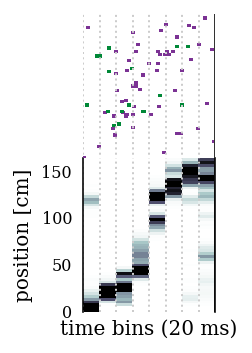

2197


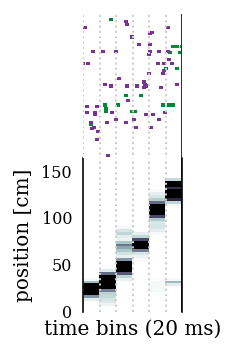

In [53]:
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
direction = "outbound_epochs"
alpha = 0.05

deepSuperficial = (results[direction]["cell_metrics"].deepSuperficial == "Deep") * -1

# idx = np.where(
#     (results[direction]['df']['score_pval_col_cycle'] < alpha)
#     & (results[direction]['df']['duration'] > 0.1)
# )[0]
idx = [1566, 1197, 1216, 1468, 1967, 1979, 2197]

cmap = ListedColormap(group_colors.values())
for i in idx:
    print(i)
    ax, fig = replay_fig.plot_all_replay(
        results[direction]["bst_placecells"][int(i)],
        results[direction]["sta_placecells"],
        results[direction]["tc"],
        results[direction]["tc"],
        vmax=0.1,
        title_str="",
        custom_raster_color=True,
        color_scale_vector=deepSuperficial,
        raster_lw=2,
        raster_lh=2,
        rasterized_heatmap=True,
        cmap=cmap,
    )

    fig.savefig(
        os.path.join(fig_save_path, "Achilles_10252013_outbound_"+str(i)+".svg"),
        dpi=300,
        bbox_inches="tight",
    )


2


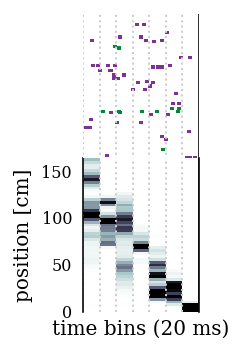

13


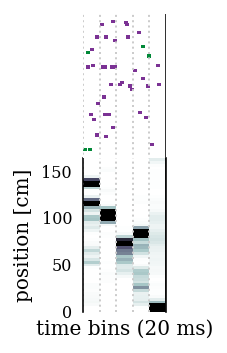

81


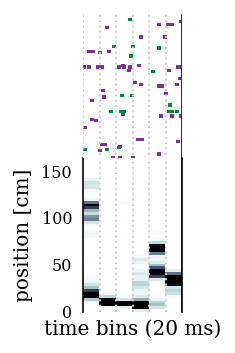

128


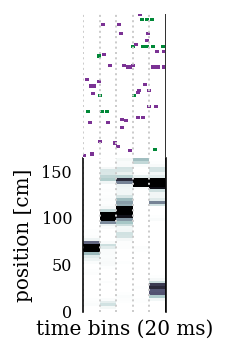

176


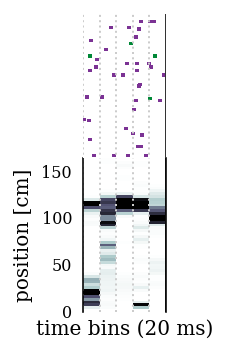

178


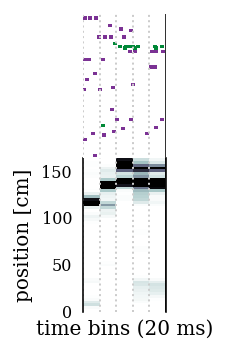

255


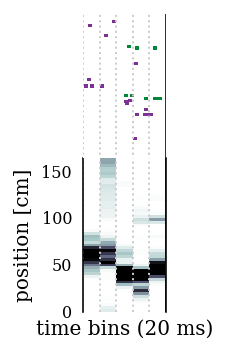

521


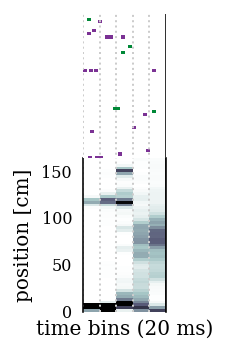

558


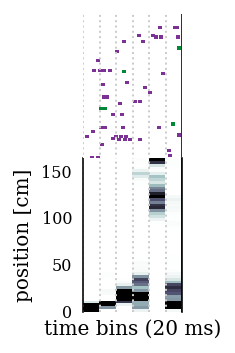

586


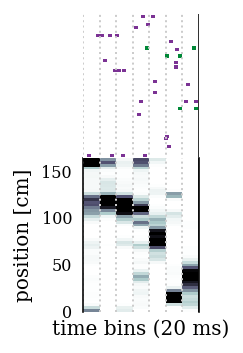

642


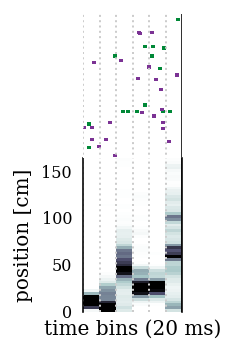

836


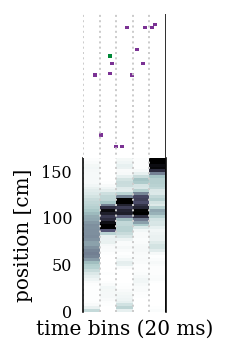

996


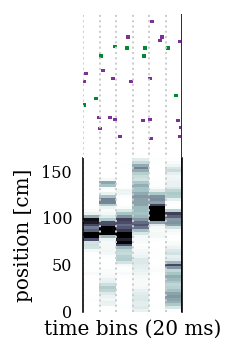

1121


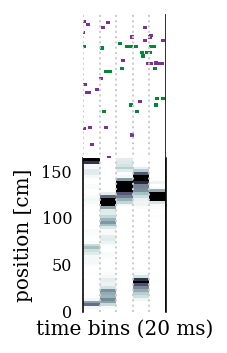

1159


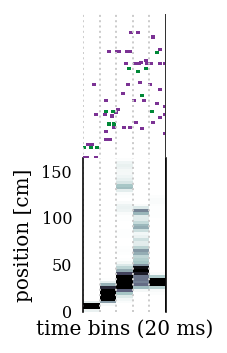

1162


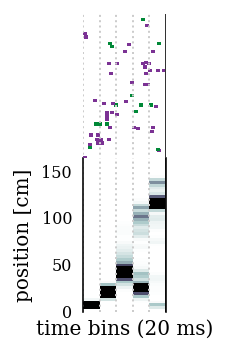

1176


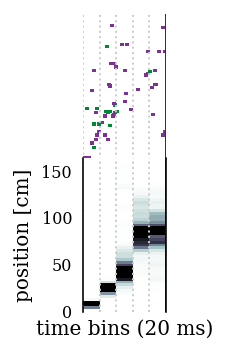

1182


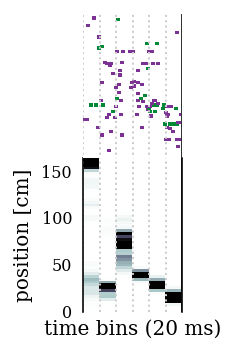

1196


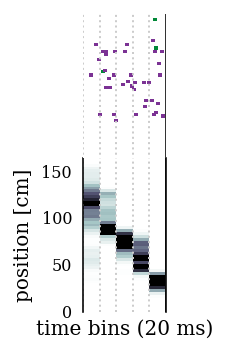

1197


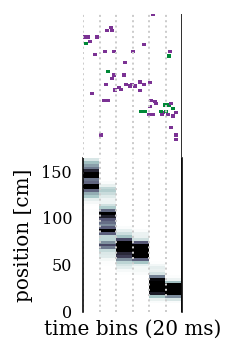

1199


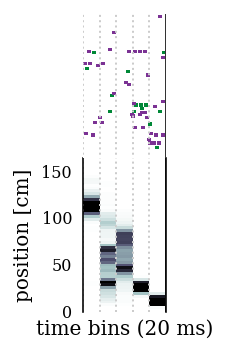

1216


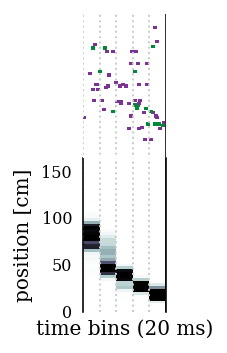

1295


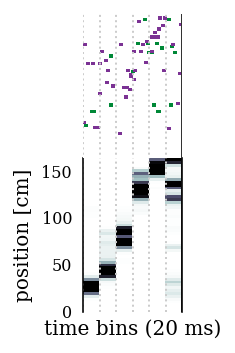

1354


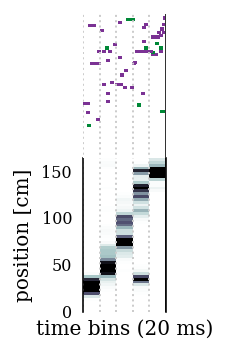

1375


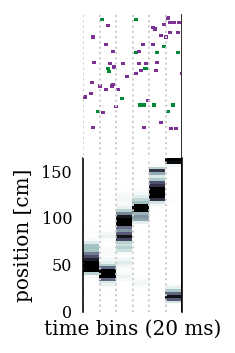

1441


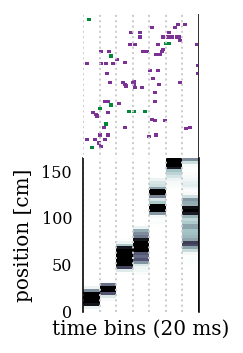

1443


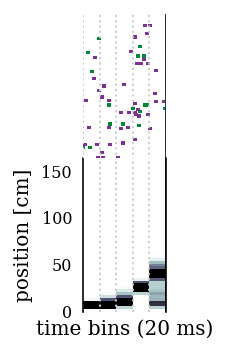

1468


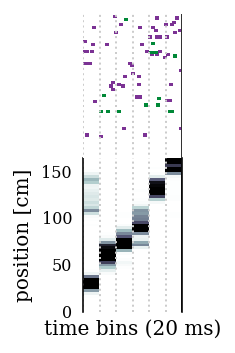

1491


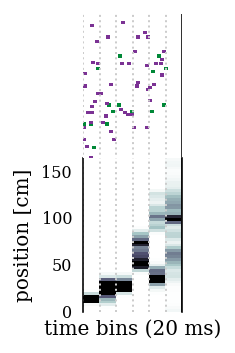

1566


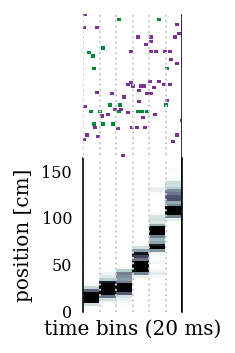

1624


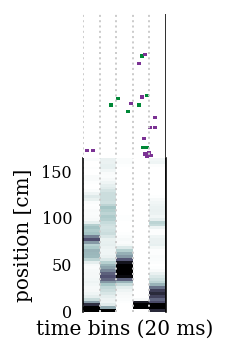

1693


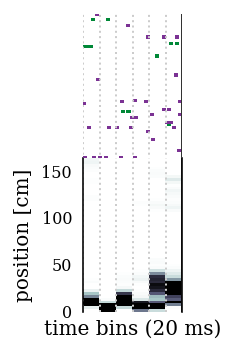

1763


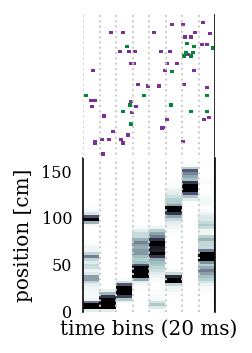

1837


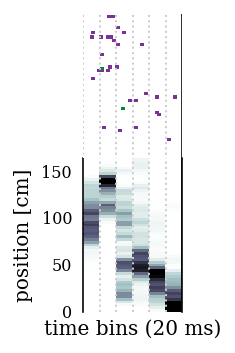

1927


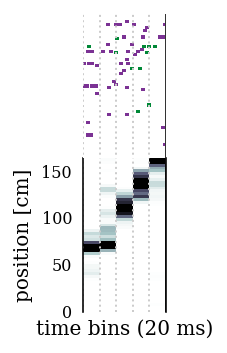

1967


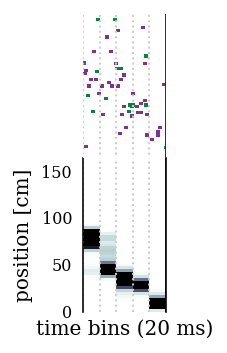

1979


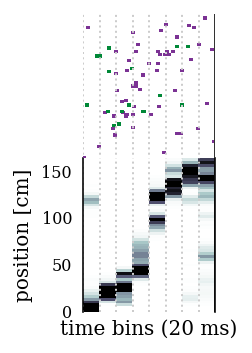

1994


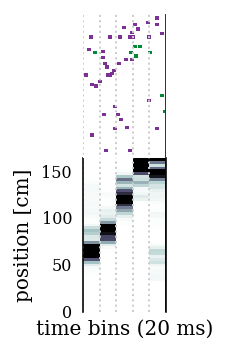

1997


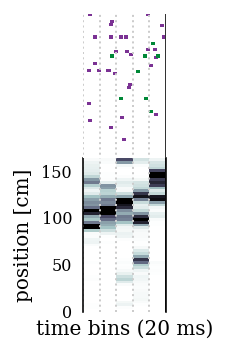

2001


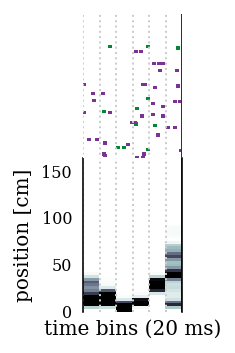

2014


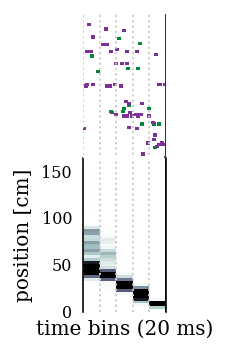

2094


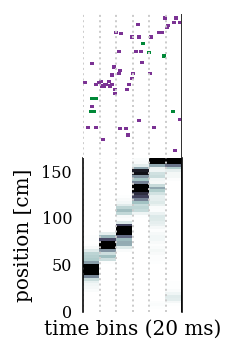

2106


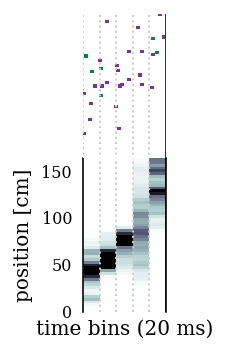

2166


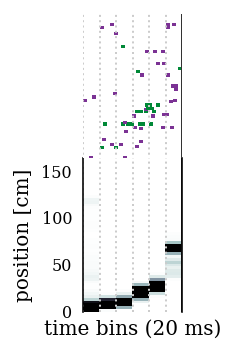

2197


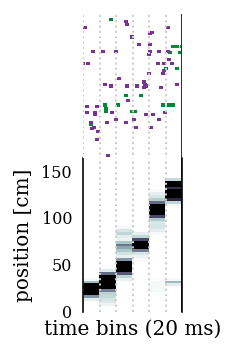

2225


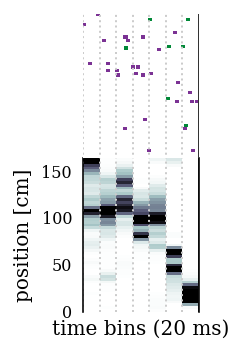

2232


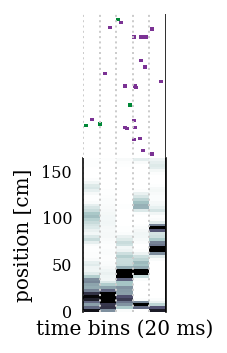

In [50]:
group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837"
}
direction = 'outbound_epochs'
alpha = 0.05

deepSuperficial = (results[direction]['cell_metrics'].deepSuperficial == "Deep") * -1

idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < alpha)
    & (results[direction]['df']['duration'] > 0.1)
)[0]

cmap = ListedColormap(group_colors.values())
for i in idx:
    print(i)
    ax, fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][int(i)],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=deepSuperficial,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True,
                                        cmap=cmap)

In [48]:
results[direction]['df'].query("duration>.1 & score_pval_col_cycle < 0.05 & n_active > 20")

,start,stop,duration,n_active,inactive_bin_prop,trajectory_score,r_squared,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type
2,47.69945,47.83945,0.14,32,0.0,0.563971,0.895217,-18.330688,260.208995,0.000999,0.000999,109.984127,916.534392,18.330688,reverse
13,545.59945,545.69945,0.10,29,0.0,0.448819,0.789721,-24.600000,1551.318519,0.000999,0.044955,98.400000,1230.000000,24.600000,reverse
81,2683.63945,2683.75945,0.12,39,0.0,0.462470,0.288312,6.421164,-2106.344268,0.307692,0.015984,32.105820,321.058201,6.421164,forward
128,3652.25945,3652.35945,0.10,34,0.0,0.681018,0.914130,17.614815,-8891.837037,0.031968,0.006993,70.459259,880.740741,17.614815,forward
176,4314.13945,4314.23945,0.10,27,0.0,0.612444,0.019231,-0.911111,749.237037,0.442557,0.004995,3.644444,45.555556,0.911111,reverse
178,4329.13945,4329.23945,0.10,26,0.0,0.715098,0.604839,4.555556,-3120.859259,0.086913,0.003996,18.222222,227.777778,4.555556,forward
558,9075.27945,9075.39945,0.12,30,0.0,0.430441,0.168846,13.623280,-30310.931217,0.002997,0.046953,68.116402,681.164021,13.623280,forward
586,9297.89945,9298.03945,0.14,22,0.0,0.368120,0.873820,-21.693122,50872.105820,0.011988,0.028971,130.158730,1084.656085,21.693122,reverse
642,10109.49945,10109.61945,0.12,28,0.0,0.471405,0.607080,8.503704,-21644.355556,0.178821,0.019980,42.518519,425.185185,8.503704,forward
996,15571.39945,15571.51945,0.12,21,0.0,0.481947,0.835774,5.119577,-19863.957672,0.168831,0.000999,25.597884,255.978836,5.119577,forward
